# EDA - Estimation of Obesity Levels

Problem Statement:

Coducting an Exploratory Data Analysis (EDA) to understand the factors that influence the prevalence of obesity withn a specific population. 

This problem statement sets the stage for analyzing various features, such as dietary habits, physical activity levels, socio-economic factors, demographics, and health indicators, to uncover patterns and insights related to obesity.

## 1: Importing Libraries

In [849]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2: Reading Data

In [850]:
dataframe = pd.read_csv(' Add obesity csv file location.')
dataframe.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77 kg,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 3: Understanding Data

In [851]:
#Renaming columns for simpler and easy understanding
dataframe.rename(columns = {'FAVC' : 'HighCalFood','FCVC': 'VegetablesFreq','NCP': 'MainMeals','CAEC' : 'BetweenMeals',
                            'CH2O': 'WaterIntake', 'SCC':'CalCheck','FAF':'ActivityFreq', 'TUE': 'DeviceUsage',
                            'CALC':'AlcoholIntake', 'MTRANS':'TravelMode', 'NObeyesdad':'ObesityCondition'}, inplace = True)


In [852]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2052 non-null   object 
 4   family_history_with_overweight  2111 non-null   object 
 5   HighCalFood                     2111 non-null   object 
 6   VegetablesFreq                  2111 non-null   float64
 7   MainMeals                       2111 non-null   float64
 8   BetweenMeals                    2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  WaterIntake                     2031 non-null   float64
 11  CalCheck                        2111 non-null   object 
 12  ActivityFreq                    21

In [853]:
dataframe.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1499
family_history_with_overweight       2
HighCalFood                          2
VegetablesFreq                     810
MainMeals                          635
BetweenMeals                         4
SMOKE                                2
WaterIntake                       1202
CalCheck                             2
ActivityFreq                      1190
DeviceUsage                       1129
AlcoholIntake                        4
TravelMode                           5
ObesityCondition                     7
dtype: int64

In [854]:
duplicate_rows = dataframe[dataframe.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 18


In [855]:
dataframe = dataframe.drop_duplicates()
print("Number of unique rows:", dataframe.shape[0])

Number of unique rows: 2093


In [836]:
#The dataset have 2092 observations with 17 features
dataframe.shape

(2093, 17)

In [856]:
#Conversion of selected columns values to percentages upto 100
columns = ['VegetablesFreq','WaterIntake','ActivityFreq','DeviceUsage']

for column in columns:
    max_value = dataframe[column].max()
    dataframe[column] = (dataframe[column] / max_value) * 100
    dataframe[column] = dataframe[column].round(2)

### 3.1 Handling Missing values

In [857]:
dataframe.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                            58
family_history_with_overweight     0
HighCalFood                        0
VegetablesFreq                     0
MainMeals                          0
BetweenMeals                       0
SMOKE                              0
WaterIntake                       80
CalCheck                           0
ActivityFreq                       0
DeviceUsage                        0
AlcoholIntake                      0
TravelMode                         0
ObesityCondition                   0
dtype: int64

In [858]:
(dataframe.isnull().sum()/(len(dataframe)))*100

Gender                            0.000000
Age                               0.000000
Height                            0.000000
Weight                            2.771142
family_history_with_overweight    0.000000
HighCalFood                       0.000000
VegetablesFreq                    0.000000
MainMeals                         0.000000
BetweenMeals                      0.000000
SMOKE                             0.000000
WaterIntake                       3.822265
CalCheck                          0.000000
ActivityFreq                      0.000000
DeviceUsage                       0.000000
AlcoholIntake                     0.000000
TravelMode                        0.000000
ObesityCondition                  0.000000
dtype: float64

In [859]:
dataframe['Weight'].unique()

array(['64', '56', '77 kg', ..., '133.742943', '133.689352', '133.346641'],
      dtype=object)

In [860]:
#Cleaning data by removing suffix 'kg' from weight column. 
#Convert Review Datatype to int
dataframe['Weight']= dataframe['Weight'].str.replace('kg','')
dataframe['Weight']

0               64
1               56
2              77 
3               87
4             89.8
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110           NaN
Name: Weight, Length: 2093, dtype: object

In [861]:
#Fill missing values with mean of that column.
dataframe['Weight'] = pd.to_numeric(dataframe['Weight'], errors='coerce')
dataframe['Weight'].fillna(dataframe['Weight'].mean(),inplace = True)
dataframe['WaterIntake'].fillna(dataframe['WaterIntake'].mean(),inplace = True)

## 4: Exploratory Data Analysis - EDA

In [862]:
dataframe.head()

,Gender,Age,Height,Weight,family_history_with_overweight,HighCalFood,VegetablesFreq,MainMeals,BetweenMeals,SMOKE,WaterIntake,CalCheck,ActivityFreq,DeviceUsage,AlcoholIntake,TravelMode,ObesityCondition
0,Female,21.0,1.62,64.0,yes,no,66.67,3.0,Sometimes,no,66.67,no,0.00,50.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,100.00,3.0,Sometimes,yes,100.00,yes,100.00,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,66.67,3.0,Sometimes,no,66.67,no,66.67,50.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,100.00,3.0,Sometimes,no,66.67,no,66.67,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,66.67,1.0,Sometimes,no,66.67,no,0.00,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 4.1 Feature Information

Attributes related with eating habits are:

1. Frequent consumption of high caloric food (HighCalFood),

2. Frequency of consumption of vegetables (VegetablesFreq),

3. Number of main meals (MainMeals),

4. Consumption of food between meals (BetweenMeals),

5. Consumption of water daily (WaterIntake),

6. Consumption of alcohol (CALC).

Attributes related with the physical condition are:

1. Calories consumption monitoring (CalCheck),

2. Physical activity frequency (ActivityFreq),

3. Time using technology devices (DeviceUsage),

4. Transportation used (TravelMode),

Other variables were:

1. Gender

2. Age

3. Height 

4. Weight

5. Family History With Over Weight

6. AlcoholIntake

7. Smoke

In [863]:
categorical_vars = dataframe.select_dtypes(include=['object']).columns
numerical_vars = dataframe.select_dtypes(include=['float64', 'int64']).columns

print("Categorical variables:")
print(categorical_vars)

print("\nNumerical variables:")
print(numerical_vars)

Categorical variables:
Index(['Gender', 'family_history_with_overweight', 'HighCalFood',
       'BetweenMeals', 'SMOKE', 'CalCheck', 'AlcoholIntake', 'TravelMode',
       'ObesityCondition'],
      dtype='object')

Numerical variables:
Index(['Age', 'Height', 'Weight', 'VegetablesFreq', 'MainMeals', 'WaterIntake',
       'ActivityFreq', 'DeviceUsage'],
      dtype='object')


In [864]:
#summary of the dataset
dataframe.describe()

,Age,Height,Weight,VegetablesFreq,MainMeals,WaterIntake,ActivityFreq,DeviceUsage
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,24.340611,1.702437,87.039424,80.692026,2.698213,66.725375,33.727243,33.128304
std,6.364372,0.093208,25.812573,17.816617,0.767182,19.946395,28.427807,30.436028
min,14.000000,1.450000,39.000000,33.330000,1.000000,33.330000,0.000000,0.000000
25%,19.911246,1.630000,67.000000,66.670000,2.693646,53.980000,4.050000,0.000000
50%,22.832105,1.701413,84.849349,79.760000,3.000000,66.670000,33.330000,31.540000
75%,26.000000,1.769328,107.012256,100.000000,3.000000,80.880000,55.750000,50.000000
max,61.000000,1.980000,173.000000,100.000000,4.000000,100.000000,100.000000,100.000000


### 4.2 Univariate Analysis

Univariate analysis: Understanding the individual variables distributions and characteristics, providing insights into each variable's behavior and patterns within the dataset.

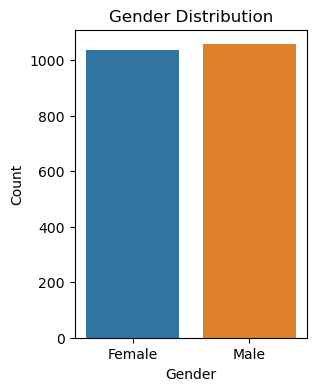

In [865]:
# Plotting the distribution of genders in the dataset
plt.figure(figsize=(3,4))
sns.countplot(data=dataframe, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

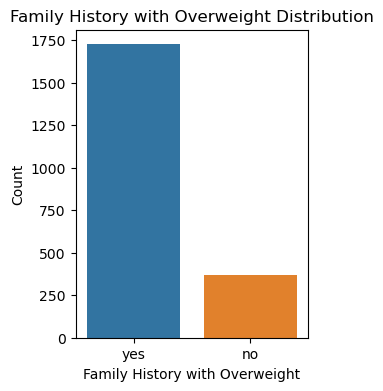

In [866]:
# Bar chart for family_history_with_overweight
plt.figure(figsize=(3, 4))
sns.countplot(data=dataframe, x='family_history_with_overweight')
plt.title('Family History with Overweight Distribution')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.show()


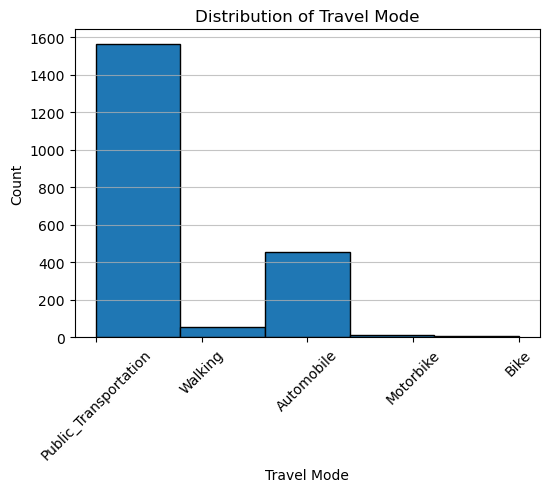

In [867]:
#Histogram for distribution of Transportation used.
plt.figure(figsize=(6, 4))
plt.hist(dataframe['TravelMode'], bins=len(dataframe['TravelMode'].unique()), edgecolor='black')
plt.title('Distribution of Travel Mode')
plt.xlabel('Travel Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

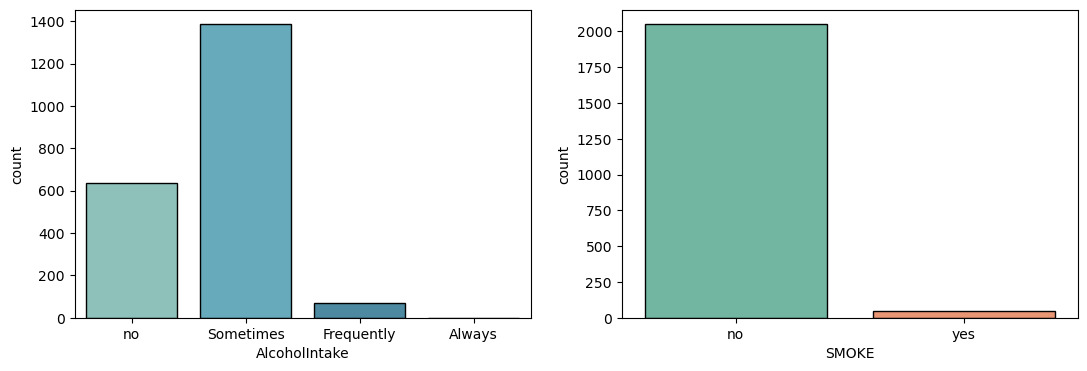

In [868]:
#Distribution of Alcohol intake and smoke

plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'AlcoholIntake', data = dataframe, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'SMOKE', data = dataframe, palette="Set2",edgecolor="black")
plt.show()

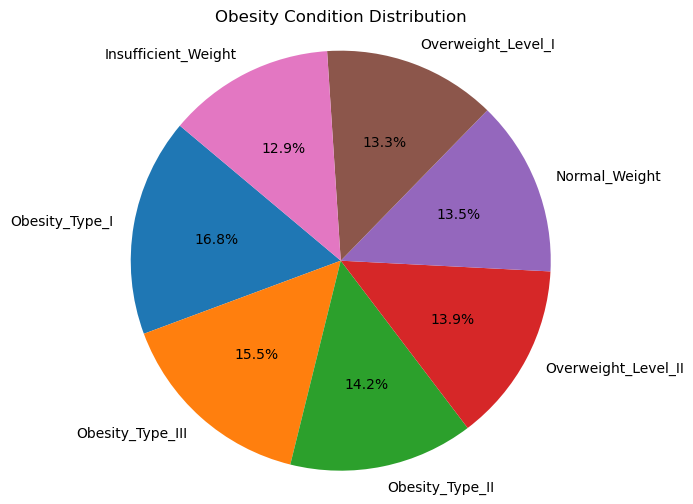

In [869]:
# Pie chart for Obesity Condition
obesity_condition_counts = dataframe['ObesityCondition'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(obesity_condition_counts, labels=obesity_condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Obesity Condition Distribution')
plt.axis('equal')
plt.show()

Observation:

1. This pie chart illustrates the distribution of obesity conditions within the dataset. 
2. Obesity_Type_I appears to be the most prevalent, comprising the largest portion of the dataset, while   Obesity_Type_III is the least common.
3. Additionally, the percentage of individuals with insufficient weight is relatively low compared to the other obesity conditions.

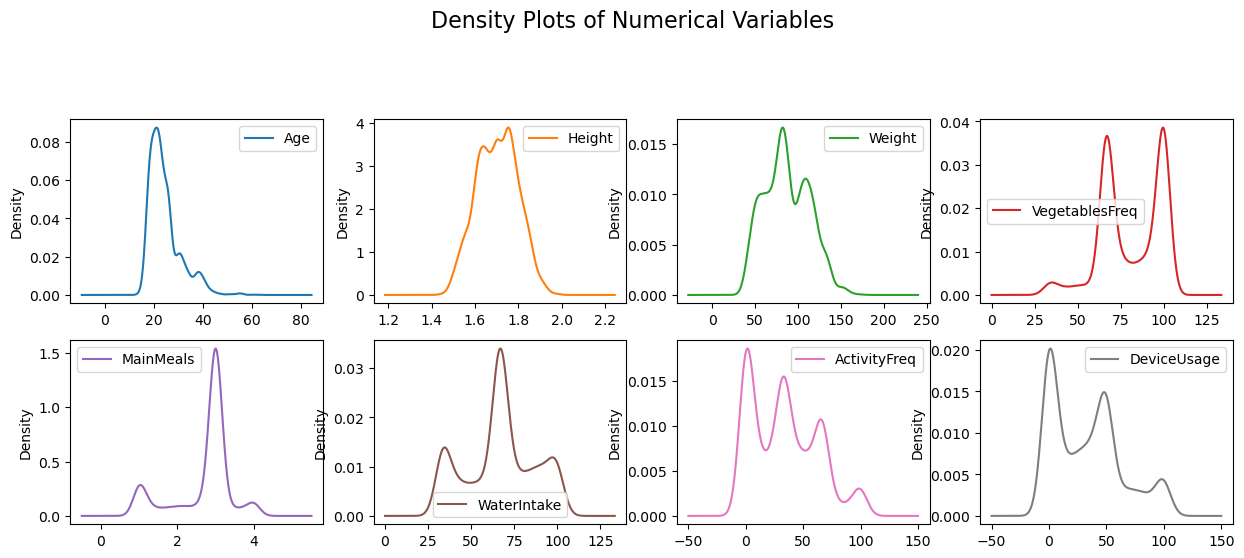

In [870]:
## Proportion of count data on numerical columns
   
dataframe.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 11))
plt.suptitle("Density Plots of Numerical Variables", fontsize=16)
plt.show()

Observation:

1. Age: The density is highest around 20 years old, indicating a concentration of younger individuals in the dataset.
2. Height: The distribution seems relatively uniform, with a slight peak around 1.7 meters.
3. Weight: The density is highest around 80 kg, suggesting a common weight range in the dataset.
4. VegetablesFreq: There are peaks at discrete values, indicating that individuals tend to report specific frequencies of vegetable consumption.
5. MainMeals: The density is highest around 3 meals per day, with fewer individuals reporting extreme values.
6. WaterIntake: The distribution appears relatively uniform, with some peaks and troughs.
7. ActivityFreq: The density is highest around 30%, suggesting that a significant portion of individuals report moderate activity frequencies.
8. DeviceUsage: The distribution is skewed towards lower values, indicating that many individuals report lower levels of device usage.


### 4.3 Bivariate analysis

Bivariate analysis to explore the relationship between Gender, Alcohol Intake, Smoking, and Obesity Condition across various variables in the dataset.

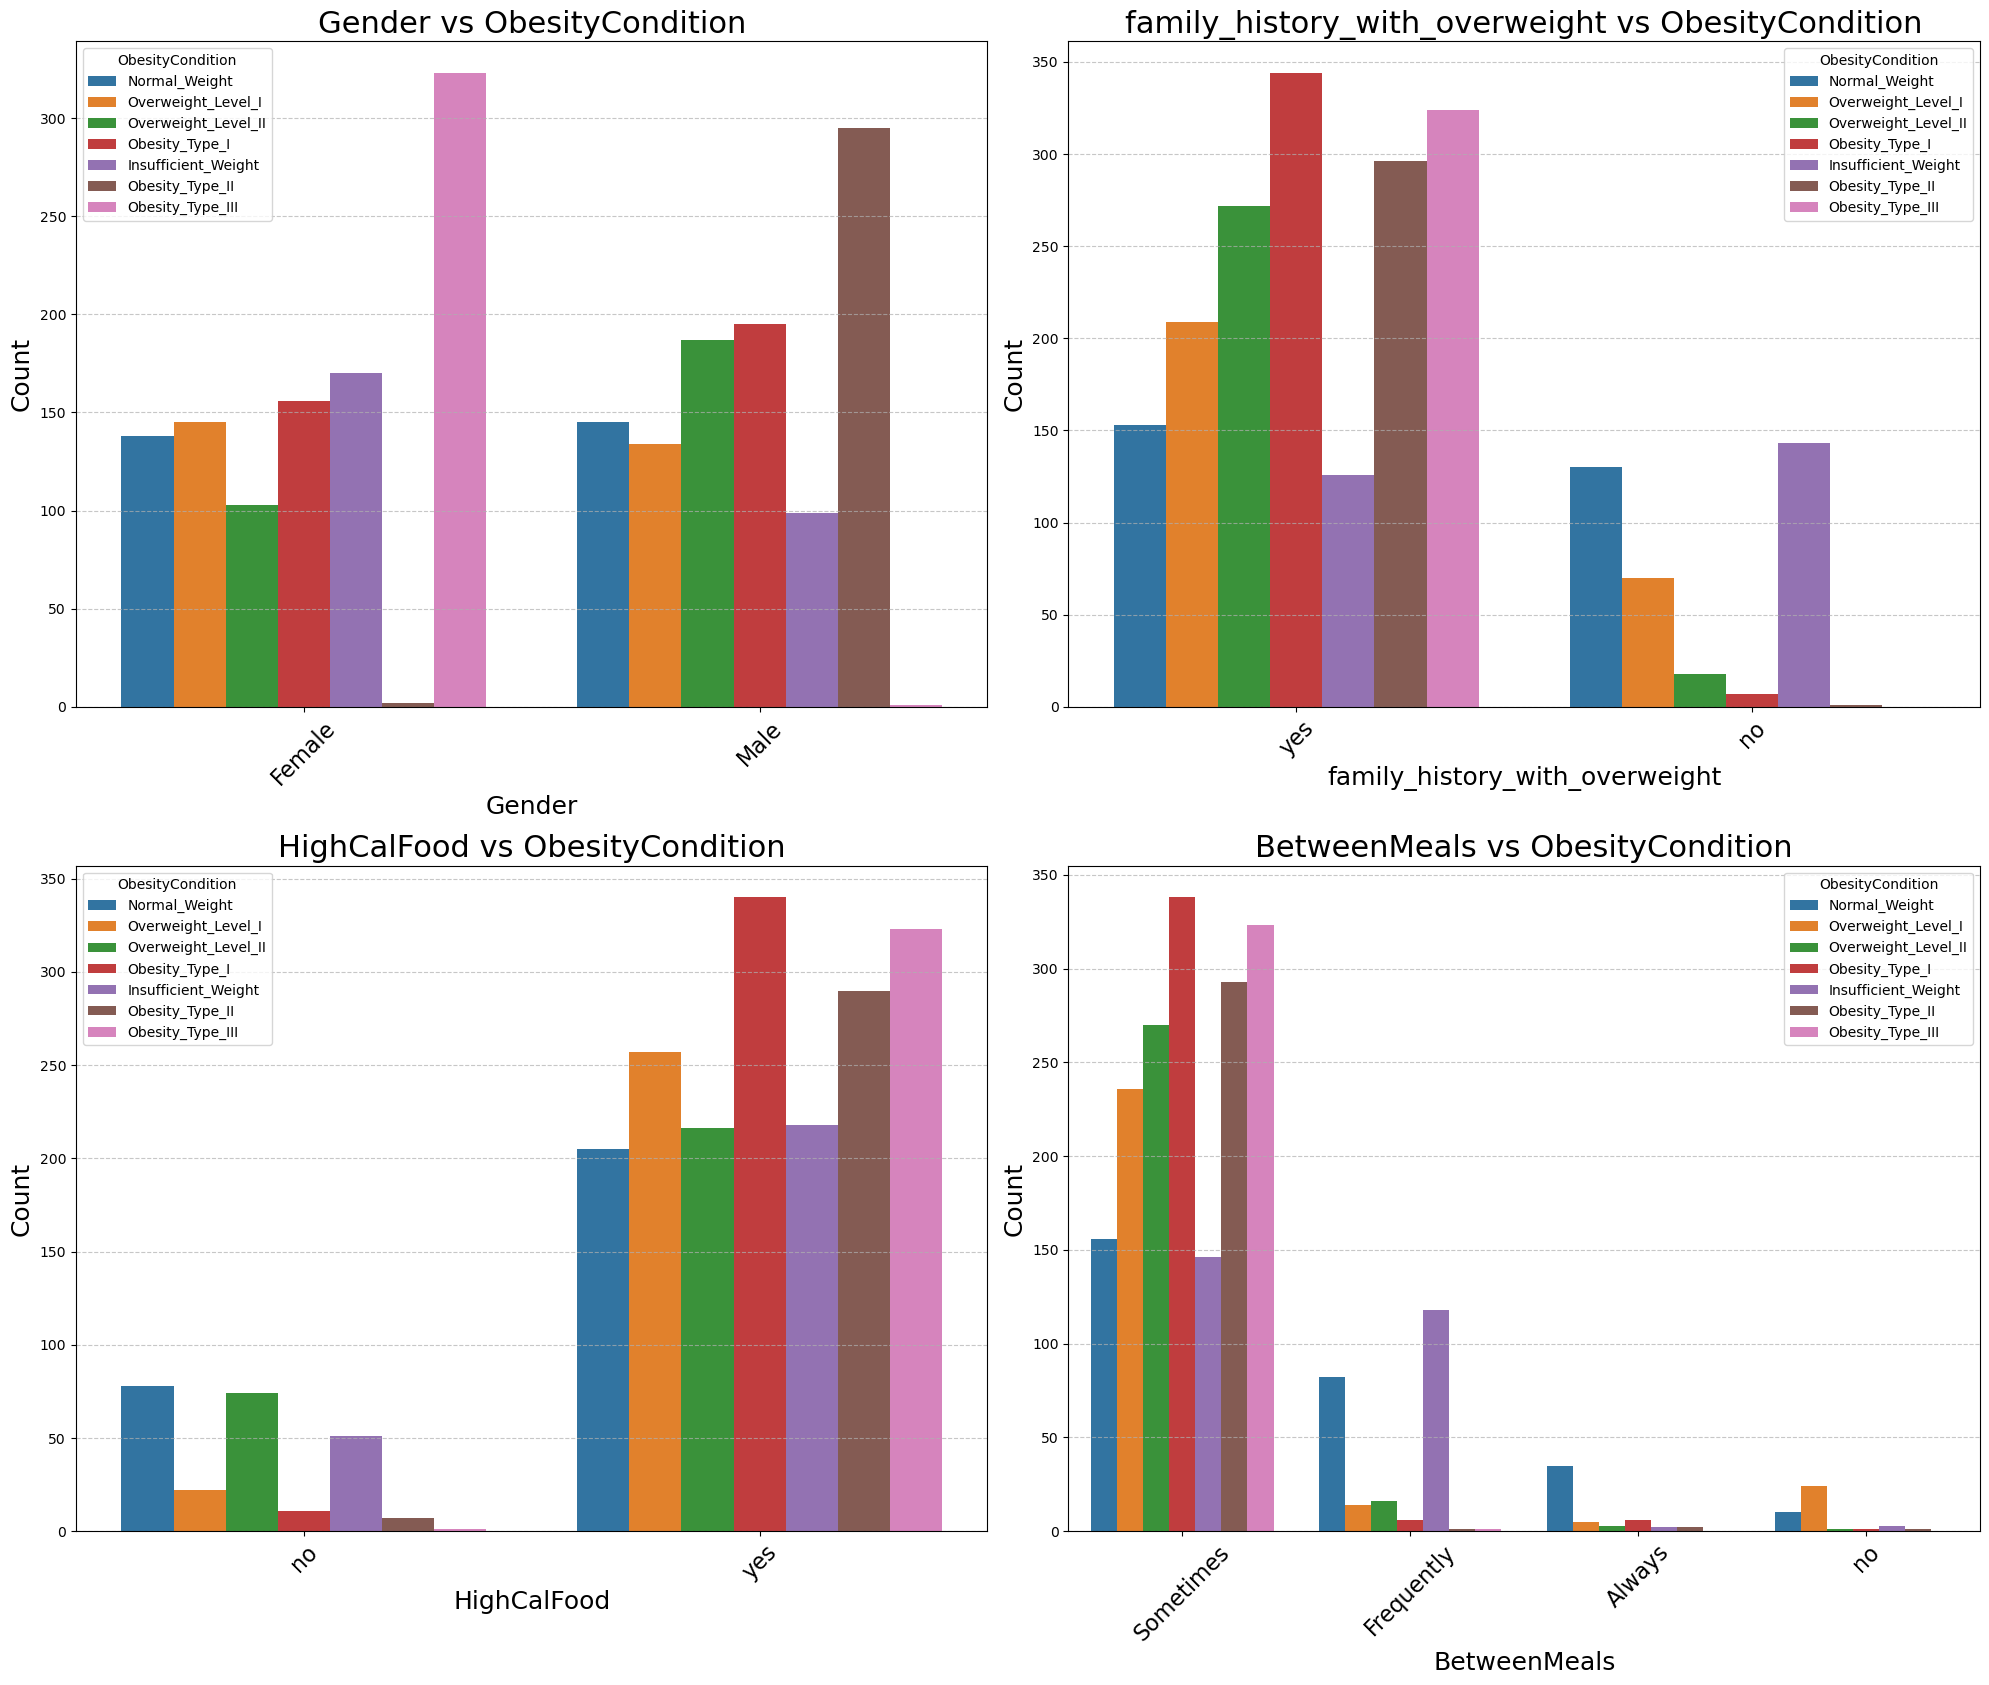

In [871]:
# Split categorical variables into two groups
num_cols = len(categorical_vars) - 1  # Exclude 'ObesityCondition' from the count
num_rows = (num_cols + 1) // 2  # Calculate number of rows needed for each grid

first_half_vars = categorical_vars[:num_cols//2]
second_half_vars = categorical_vars[num_cols//2:]

# Create the first plot for the first half of categorical variables
plt.figure(figsize=(20, 8 * num_rows))

for i, col in enumerate(first_half_vars):
    if col != 'ObesityCondition':
        plt.subplot(num_rows, 2, i+1)
        sns.countplot(x=col, hue='ObesityCondition', data=dataframe)
        plt.title(f'{col} vs ObesityCondition', fontsize=22)
        plt.xticks(rotation=45, fontsize=16)
        plt.xlabel(col, fontsize=18)
        plt.ylabel('Count', fontsize=18)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Observation:

Gender vs Obesity Condition
- The plot suggests that females tend to have higher count of obesity cases than men.

Family history with over weight vs Obesity Condition
- Individuals with a family history of overweight seem to have a higher count of obesity cases with highest record of Obesity Type I compared to those without such a family history. 

Frequent consumption of high caloric food vs Obesity Condition
- People consuming high calorie food is likely to have Obesity Type I and with no high calorie consumption have normal weight.

Consumption of food between meals vs Obesity Condition
- Higher frequency of between-meal snacks correlates with a higher likelihood of obesity.


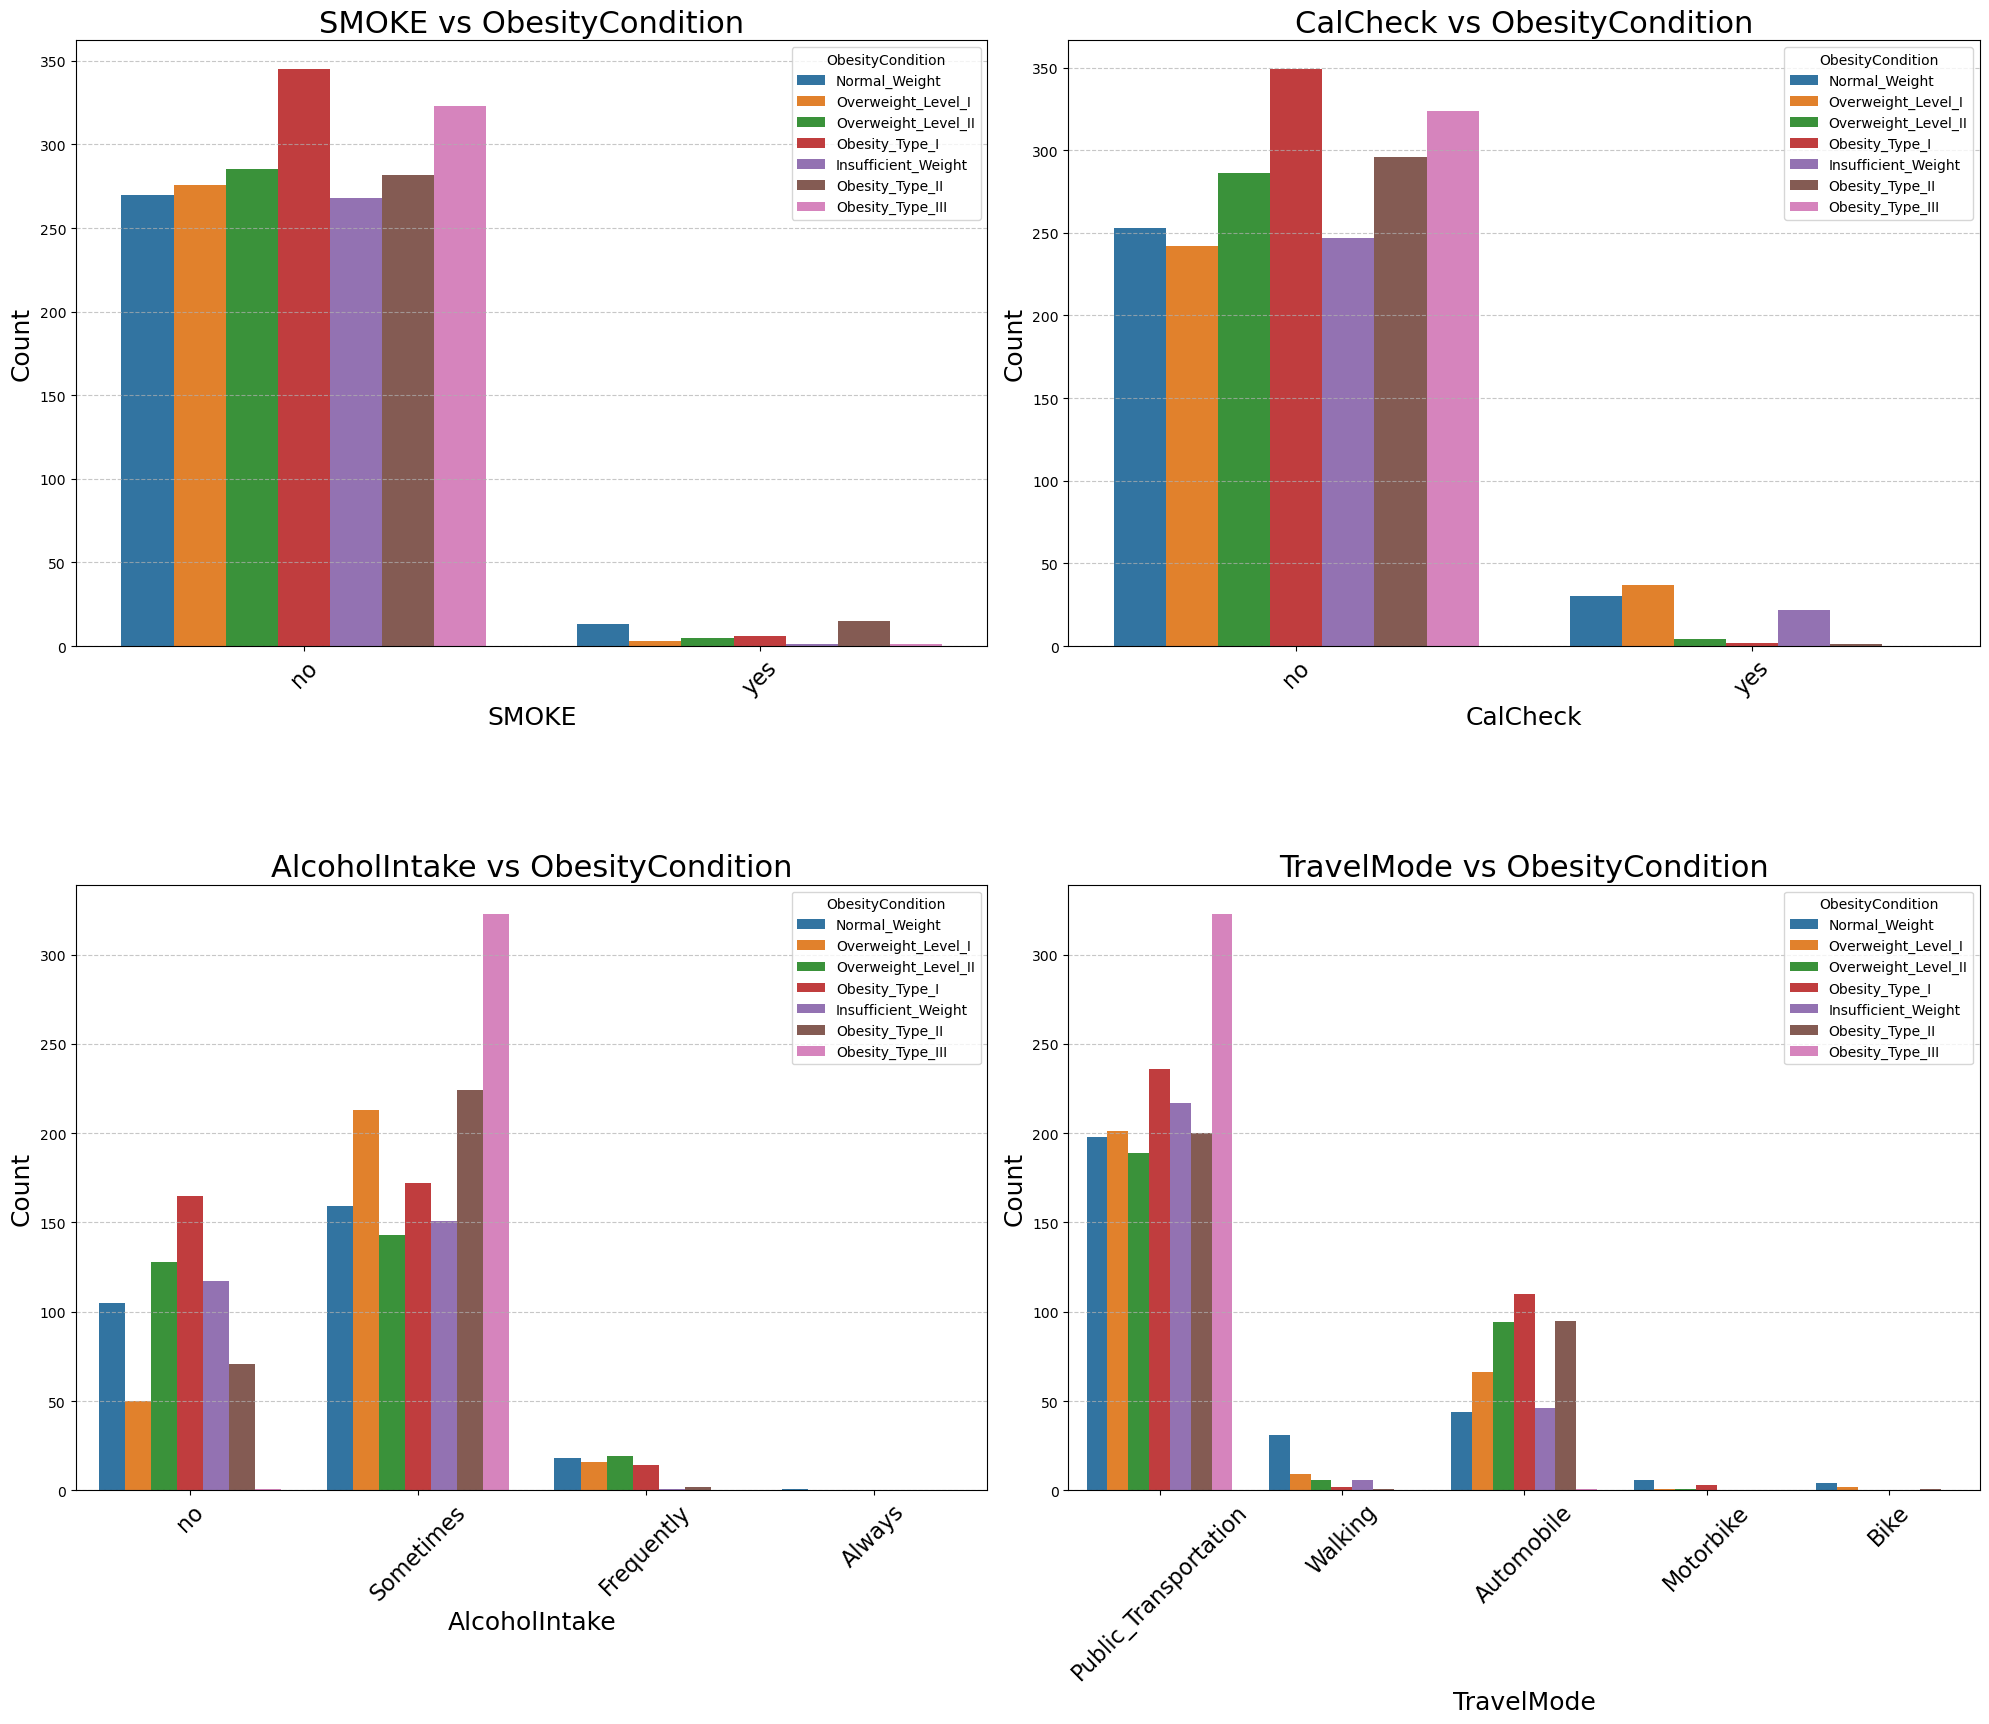

In [872]:

# Create the second plot for the second half of categorical variables
plt.figure(figsize=(20, 8 * num_rows))

for i, col in enumerate(second_half_vars):
    if col != 'ObesityCondition':
        plt.subplot(num_rows, 2, i+1)
        sns.countplot(x=col, hue='ObesityCondition', data=dataframe)
        plt.title(f'{col} vs ObesityCondition', fontsize=22)
        plt.xticks(rotation=45, fontsize=16)
        plt.xlabel(col, fontsize=18)
        plt.ylabel('Count', fontsize=18)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Observation:

Smoke vs Obesity Condition
- Smoking appears to have a negative correlation with obesity condition, suggesting that smokers may have a lower prevalence of obesity compared to non-smokers. However, this observation does not justify or promote smoking, as it is associated with numerous adverse health effects beyond weight management. 

Calories consumption monitoring vs Obesity Condition
- Individuals who demonstrate a consistent pattern of higher calorie consumption are more likely to exhibit obesity condition. However, it's not the sole determinant, other factors also influence obesity condition.

Alcohol Intake vs Obesity Condition
- The data suggests a mixed association between alcohol intake and obesity. While higher alcohol consumption may correlate with obesity in some cases, there are instances of obesity even with lower alcohol intake. This implies that factors beyond alcohol consumption, like diet and physical activity, likely contribute to obesity as well.

Transportation used vs Obesity Condition
- Public transportation users demonstrate a greater likelihood for obesity compared to those who drive, with automobile users ranking second in obesity prevalence.


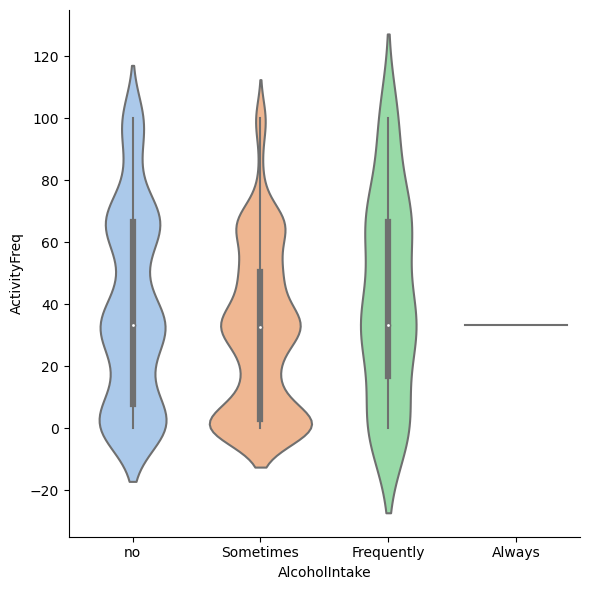

In [873]:
#Displays the distribution of activity frequency across different levels of alcohol intake using violin plots. 

sns.catplot(
    data=dataframe, x="AlcoholIntake", y="ActivityFreq", 
    kind="violin", palette="pastel", width=0.8,
    height=6 
)

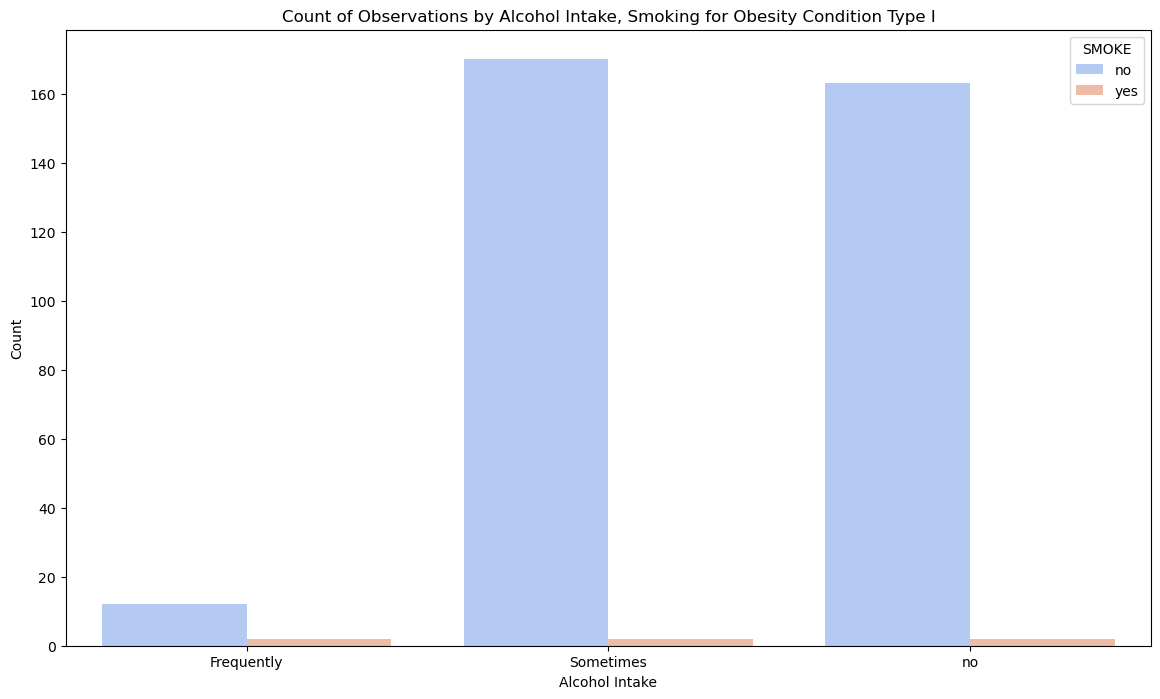

In [874]:
alcohol_smoke_counts = Obesity_TypeI.groupby(['AlcoholIntake', 'SMOKE']).size().reset_index(name='Count')

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=alcohol_smoke_counts, x='AlcoholIntake', y='Count', hue='SMOKE', palette='coolwarm')
plt.title('Count of Observations by Alcohol Intake, Smoking for Obesity Condition Type I')
plt.xlabel('Alcohol Intake')
plt.ylabel('Count')
plt.legend(title='SMOKE')
plt.show()

Observation:

This bar plot illustrates the count of observations categorized by alcohol intake, smoking habits, and obesity condition


In [875]:
print("Distribution of ObesityCondition:")
print(dataframe['ObesityCondition'].value_counts())

Distribution of ObesityCondition:
ObesityCondition
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          283
Overweight_Level_I     279
Insufficient_Weight    269
Name: count, dtype: int64


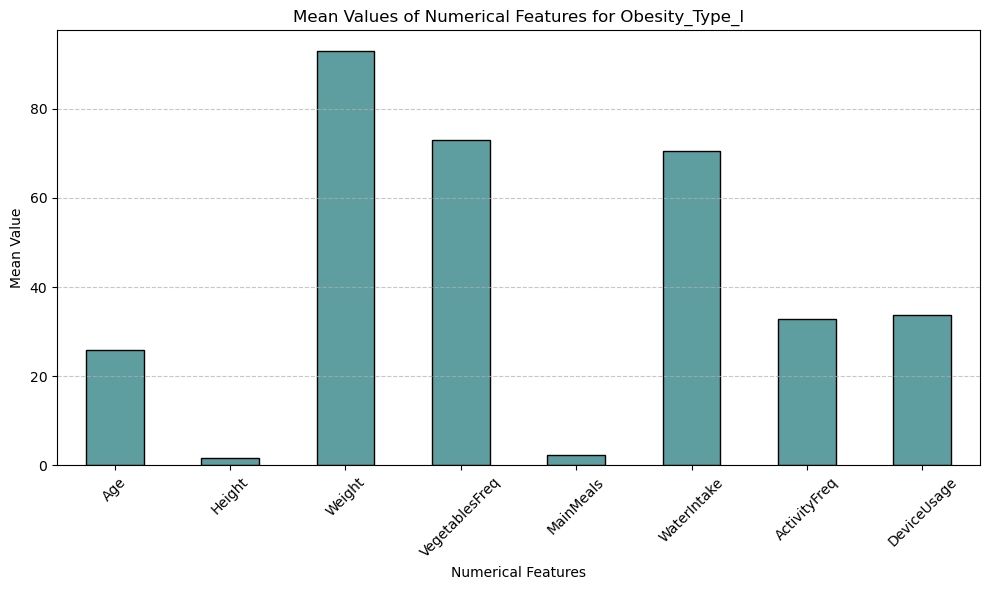

In [876]:
obesity_type_I = dataframe[dataframe['ObesityCondition'] == 'Obesity_Type_I']

# Summary Statistics within the 'Obesity_Type_I' group
numerical_summary = obesity_type_I[numerical_vars].describe()

# Mean values from the summary statistics
mean_values = numerical_summary.loc['mean']

# Plotting the mean values as a bar plot
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color='#5F9EA0', edgecolor='black')
plt.title('Mean Values of Numerical Features for Obesity_Type_I')
plt.xlabel('Numerical Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [877]:
#Summary of numerical values
numerical_summary

,Age,Height,Weight,VegetablesFreq,MainMeals,WaterIntake,ActivityFreq,DeviceUsage
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,25.884941,1.693804,92.901767,72.869886,2.431862,70.407765,32.891510,33.837066
std,7.755700,0.098414,11.406972,14.399371,0.789471,20.821780,29.822502,34.394943
min,15.000000,1.500000,75.000000,33.330000,1.000000,33.330000,0.000000,0.000000
25%,20.875385,1.617939,82.266508,66.670000,1.754339,58.435000,0.565000,0.000000
50%,22.975526,1.681855,90.671871,66.670000,3.000000,67.170000,33.020000,26.880000
75%,29.781305,1.780758,103.738394,80.085000,3.000000,88.590000,56.420000,60.655000
max,52.000000,1.980000,125.000000,100.000000,3.000000,100.000000,100.000000,100.000000


Observation:

The bar plot visualizes the mean values of numerical features within the 'Obesity_Type_I' group. 

- Age: The average age of individuals with Obesity Type I is around 26 years.

- Height: On average, individuals with Obesity Type I have a height of approximately 1.7 meters.

- Weight: The mean weight for individuals with Obesity Type I is about 97 kilograms.

- VegetablesFreq: The average frequency of vegetable consumption among individuals with Obesity Type I is around     72.8 percent per day.

- MainMeals: Individuals with Obesity Type I have an average of about 2.4 main meals per day, indicating a lower frequency of main meal consumption compared to other dietary habits.

- WaterIntake: Individuals with Obesity Type I consume an average of approximately 70 units of water, reflecting a moderate water intake level compared to other dietary and lifestyle factors.

- ActivityFreq: On average, individuals classified under Obesity Type I engage in physical activity about 33 times per week.

- DeviceUsage: The average device usage among individuals with Obesity Type I is approximately 34 units.

These insights provide a summary of the central tendency of numerical features within the specific subgroup of individuals with Obesity Type I.


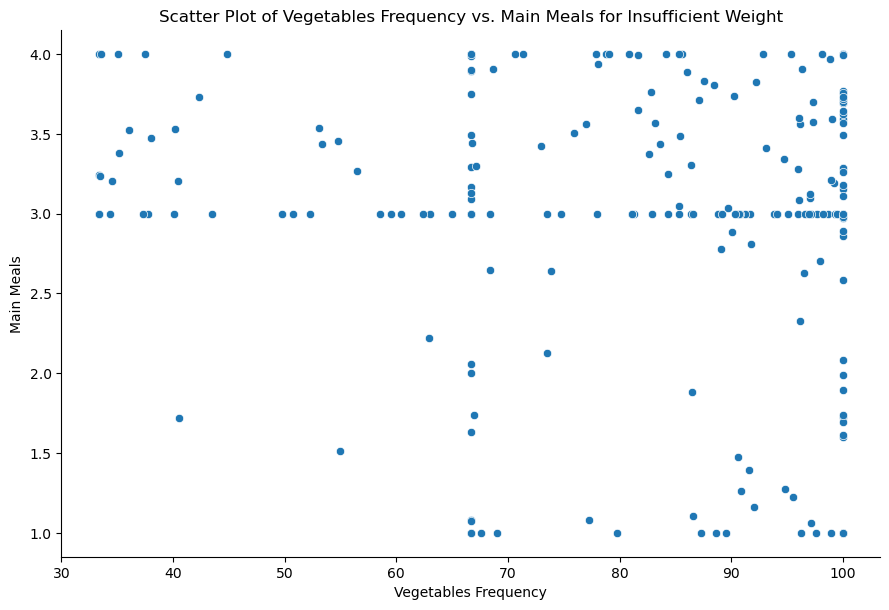

In [878]:
#Grouping Insufficient weight data
insufficient_weight_data = dataframe[dataframe['ObesityCondition'] == 'Insufficient_Weight']

# Scatter plot for Insufficient Weight
sns.relplot(data=insufficient_weight_data, x="VegetablesFreq", y="MainMeals", height=6, aspect=1.5)
plt.title('Scatter Plot of Vegetables Frequency vs. Main Meals for Insufficient Weight')
plt.xlabel('Vegetables Frequency')
plt.ylabel('Main Meals')
plt.show()

### 4.4 Multivariate analysis

Multivariate analysis explores relationships between multiple variables simultaneously. It offers insight into complex interactions withing dataset.

In [879]:
# Group by ObesityCondition and calculating min and max of weight and height
age_height_summary = dataframe.groupby('ObesityCondition').agg({'Age': ['min', 'max'], 'Height': ['min', 'max']})

# Reset index to make ObesityCondition a column instead of index
age_height_summary = age_height_summary.reset_index()

# Differences between minimum and maximum values
age_height_summary['Age_Difference'] = age_height_summary[('Age', 'max')] - age_height_summary[('Age', 'min')]
age_height_summary['Height_Difference'] = age_height_summary[('Height', 'max')] - age_height_summary[('Height', 'min')]

print(age_height_summary)


      ObesityCondition   Age       Height       Age_Difference  \
                         min   max    min   max                  
0  Insufficient_Weight  16.0  39.0   1.52  1.90           23.0   
1        Normal_Weight  14.0  61.0   1.50  1.93           47.0   
2       Obesity_Type_I  15.0  52.0   1.50  1.98           37.0   
3      Obesity_Type_II  20.0  41.0   1.60  1.92           21.0   
4     Obesity_Type_III  18.0  26.0   1.56  1.87            8.0   
5   Overweight_Level_I  16.0  55.0   1.45  1.90           39.0   
6  Overweight_Level_II  17.0  56.0   1.48  1.93           39.0   

  Height_Difference  
                     
0              0.38  
1              0.43  
2              0.48  
3              0.32  
4              0.31  
5              0.45  
6              0.45  


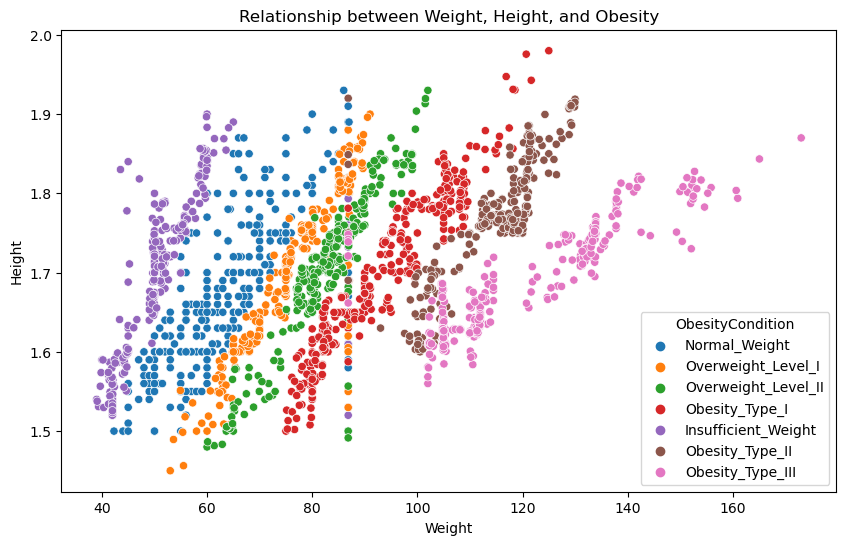

In [741]:
#Health Indicators: Weight, Height
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='Weight', y='Height', hue='ObesityCondition')
plt.title('Relationship between Weight, Height, and Obesity')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

Observation:

The scatter plot visualizes the relationship between weight and height, with points colored by obesity condition, offering insights into potential correlations between these health indicators and obesity.

For example, if we observe a cluster of red dots (representing obesity type I) towards the middle of the plot, it suggests that individuals with obesity type I tend to have higher weight and height values compared to individuals with normal weight (represented by blue dots).

Conversely, if we notice a scattering of blue dots (representing normal weight) across the plot with a more even distribution, it indicates that individuals with normal weight have varying weight and height values, with no clear concentration in any particular region of the plot.

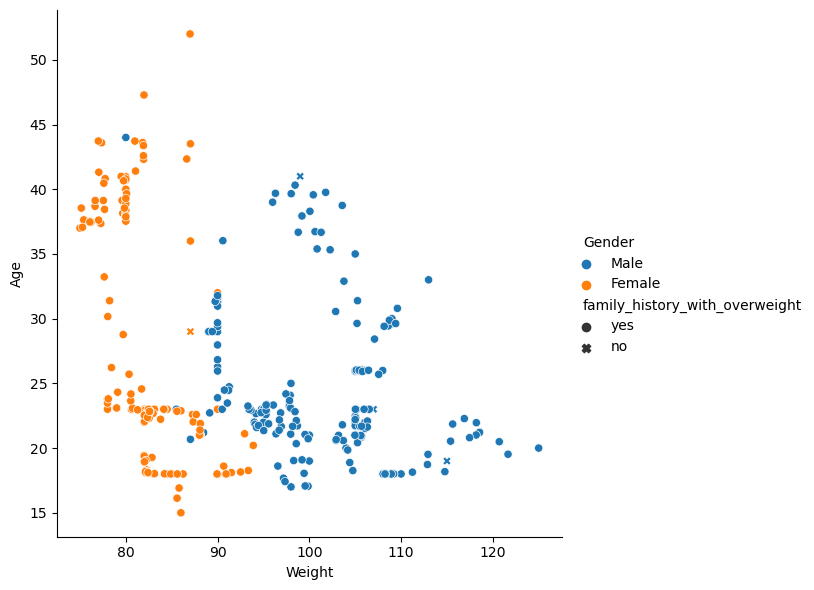

In [880]:
#Demographic Factors: Age', 'Gender', 'Weight' and 'family_history_with_overweight'
Obesity_TypeI = dataframe[dataframe['ObesityCondition'] == 'Obesity_Type_I']
sns.relplot(
    data=Obesity_TypeI,
    x="Weight", y="Age", hue="Gender", style="family_history_with_overweight",
    height=6, aspect=1
)

Observation:

The scatter plot visualizes the relationship between weight, age, gender, and family history of overweight within the Obesity Type I group. It offers insights into potential correlations between these demographic factors and obesity.

For example, if we observe a clustering of points towards a particular region of the plot, it may suggest a correlation between weight and age, with distinct patterns based on gender and family history of overweight. Additionally, the distribution of points and their colors can provide insights into the relative prevalence of obesity within different demographic groups.

- There's a cluster of blue dots (representing males) towards the upper-right region of the plot, indicating that males with a family history of overweight tend to have higher weights at younger ages.
- Meanwhile, orange dots (representing females with and with family history of overweight) across the plot shows, they are less weight at younger age and also when they are old.(left side of plot)

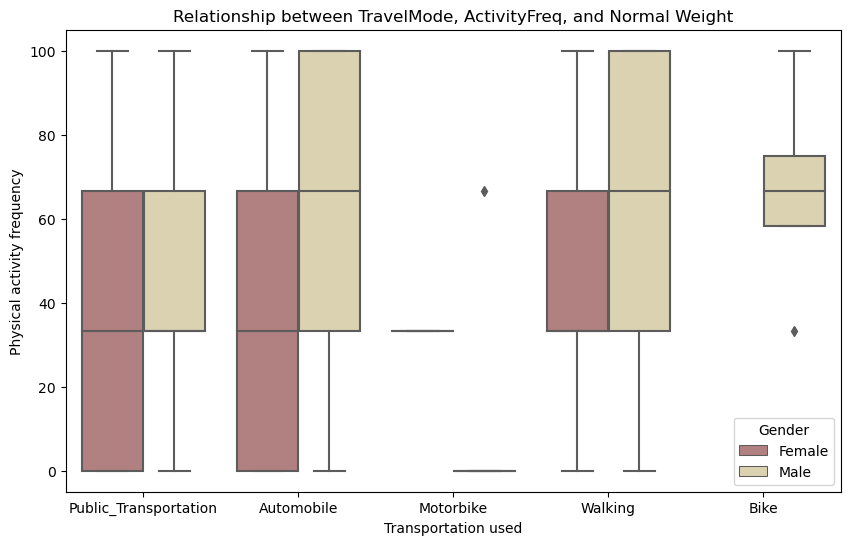

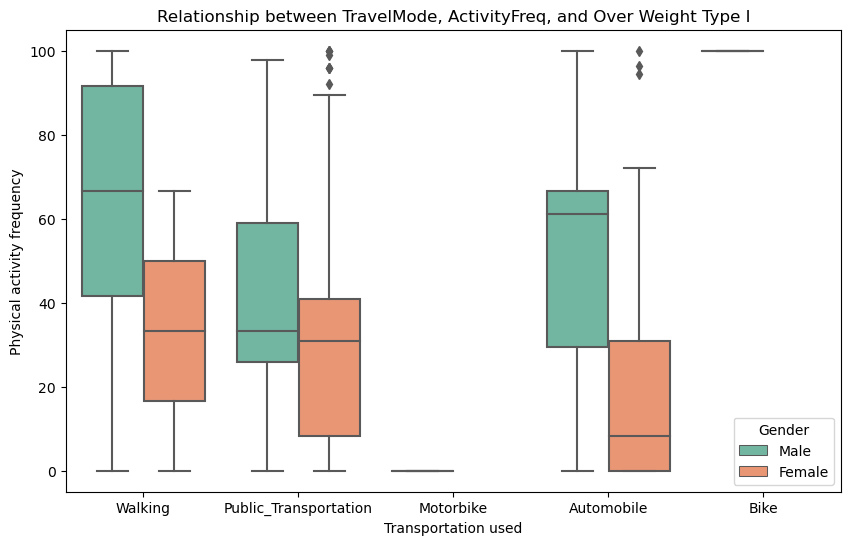

In [881]:
# Example box plots between categorical variable ('TravelMode') and numerical variable ('Weight')
Normal_Weight = dataframe[dataframe['ObesityCondition'] == 'Normal_Weight']

plt.figure(figsize=(10, 6))
sns.boxplot(data = Normal_Weight, x='TravelMode', y='ActivityFreq', hue='Gender', palette='pink')
plt.title('Relationship between TravelMode, ActivityFreq, and Normal Weight')
plt.xlabel('Transportation used')
plt.ylabel('Physical activity frequency')
plt.show()


Over_Weight = dataframe[dataframe['ObesityCondition'] == 'Overweight_Level_I']

plt.figure(figsize=(10, 6))
sns.boxplot(data = Over_Weight, x='TravelMode', y='ActivityFreq', hue='Gender', palette='Set2')
plt.title('Relationship between TravelMode, ActivityFreq, and Over Weight Type I')
plt.xlabel('Transportation used')
plt.ylabel('Physical activity frequency')
plt.show()

Observation:

The box plot allows us to compare the distribution of physical activity frequency across different transportation modes, with separate box plots for each gender. 

Normal Weight :
- Public Transportation: Both male and female have a median activity frequency of approximately 33 units, and exhibit variability in their activity frequency.
- Automobile: Females have a lower median activity frequency of around 33 units, with considerable variability. Males, however, show a higher median frequency of approximately 66 units, with less variability.
- Motorbike: There is limited data for females, with only one observation showing a median activity frequency of 33 units. 
- Walking: Males tend to engage in more physical activity (median frequency of 66 units) compared to females (median frequency of 33 units), reflecting gender differences in activity levels.
- Bike: The male bike users, depicted in the graph, exhibit a median activity frequency of 66 units, indicating a higher level of physical activity compared to other travel modes.

Over Weight:
- The graph illustrates that male automobile users have a median activity frequency of 60 units, considerably higher than their female counterparts, who exhibit a median frequency of 8 units. Similarly, male public transportation users demonstrate a median frequency of 33 units, whereas females have a median of 30 units.


In [882]:
#Distribution of activity frequency among individuals with normal weight, categorized by their gender 
#and preferred mode of travel.

Normal_Weight = dataframe[dataframe['ObesityCondition'] == 'Normal_Weight']
Normal_Weight.groupby(['TravelMode', 'Gender'])['ActivityFreq'].describe()

count       mean        std    min     25%  \
TravelMode            Gender                                               
Automobile            Female   25.0  33.333600  37.268545   0.00   0.000   
                      Male     19.0  59.648947  40.944597   0.00  33.330   
Bike                  Male      4.0  66.667500  27.217914  33.33  58.335   
Motorbike             Female    1.0  33.330000        NaN  33.33  33.330   
                      Male      5.0  13.334000  29.815730   0.00   0.000   
Public_Transportation Female   98.0  36.734082  31.926311   0.00   0.000   
                      Male    100.0  43.333000  31.606127   0.00  33.330   
Walking               Female   14.0  42.856429  33.150672   0.00  33.330   
                      Male     17.0  54.902353  38.982808   0.00  33.330   

                                50%       75%     max  
TravelMode            Gender                           
Automobile            Female  33.33   66.6700  100.00  
                      Male    66.67  100.0000  100.00  
Bike                  Male    66.67   75.0025  100.00  
Motorbike             Female  33.33   33.3300   33.33  
                      Male     0.00    0.0000   66.67  
Public_Transportation Female  33.33   66.6700  100.00  
                      Male    33.33   66.6700  100.00  
Walking               Female  33.33   66.6700  100.00  
                      Male    66.67  100.0000  100.00

In [883]:
#Distribution of activity frequency among individuals with Overweight_Level_I, categorized by their gender 
#and preferred mode of travel.

Over_Weight = dataframe[dataframe['ObesityCondition'] == 'Overweight_Level_I']
Over_Weight.groupby(['TravelMode', 'Gender'])['ActivityFreq'].describe()

count        mean        std    min       25%  \
TravelMode            Gender                                                  
Automobile            Female   44.0   21.100455  28.016511    0.0    0.0000   
                      Male     22.0   49.900455  30.222030    0.0   29.4225   
Bike                  Male      2.0  100.000000   0.000000  100.0  100.0000   
Motorbike             Male      1.0    0.000000        NaN    0.0    0.0000   
Public_Transportation Female   98.0   33.053776  29.192659    0.0    8.2525   
                      Male    103.0   38.026990  24.047114    0.0   25.8400   
Walking               Female    3.0   33.333333  33.335000    0.0   16.6650   
                      Male      6.0   61.111667  38.968839    0.0   41.6650   

                                  50%       75%     max  
TravelMode            Gender                             
Automobile            Female    8.160   30.9000  100.00  
                      Male     60.980   66.6700  100.00  
Bike                  Male    100.000  100.0000  100.00  
Motorbike             Male      0.000    0.0000    0.00  
Public_Transportation Female   30.785   40.9500  100.00  
                      Male     33.330   59.0500   97.72  
Walking               Female   33.330   50.0000   66.67  
                      Male     66.670   91.6675  100.00

Text(0.5, 1.0, 'Dietary Habits for Normal Weight')

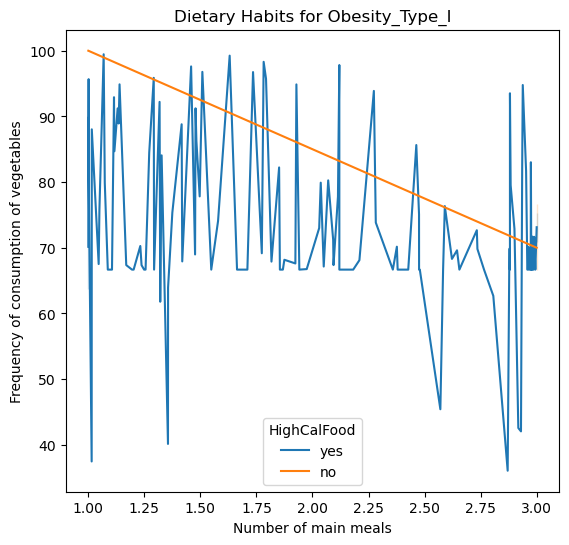

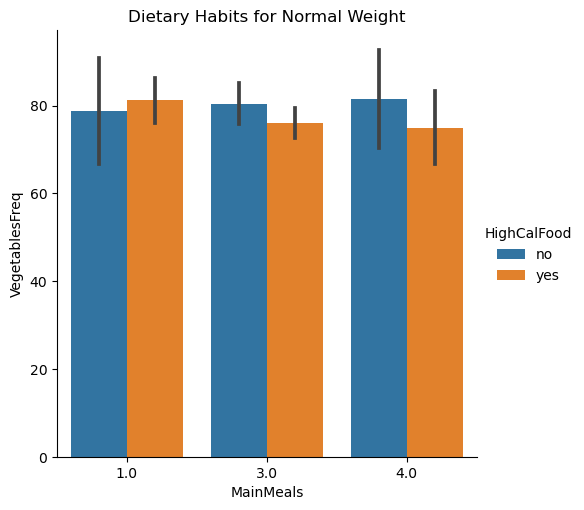

In [884]:
#Dietary Habits: ['VegetablesFreq', 'MainMeals', 'HighCalFood']

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=Obesity_TypeI, x="MainMeals", y="VegetablesFreq", hue="HighCalFood")
plt.title('Dietary Habits for Obesity_Type_I')
plt.xlabel('Number of main meals')
plt.ylabel('Frequency of consumption of vegetables')

sns.catplot(data=Normal_Weight, x="MainMeals", y="VegetablesFreq", hue="HighCalFood", kind="bar")
plt.title('Dietary Habits for Normal Weight')

Observation:

- The line plot illustrates the relationship between dietary habits for individuals with Obesity Type I. It examines the frequency of consuming vegetables against the number of main meals, with different colors representing the consumption of high-calorie foods.

- As individuals with Obesity Type I increase their main meal frequency from one to three, their vegetable consumption decreases from 100 to 70 units. This suggests a negative correlation between meal frequency and vegetable intake, potentially impacting their obesity condition.

- For those with normal weight who consume four meals, the frequency of vegetable consumption is lower when accompanied by high-calorie food, in contrast, when individuals with normal weight consume one meal, the frequency of vegetable consumption is higher, even in the presence of high caloric food.


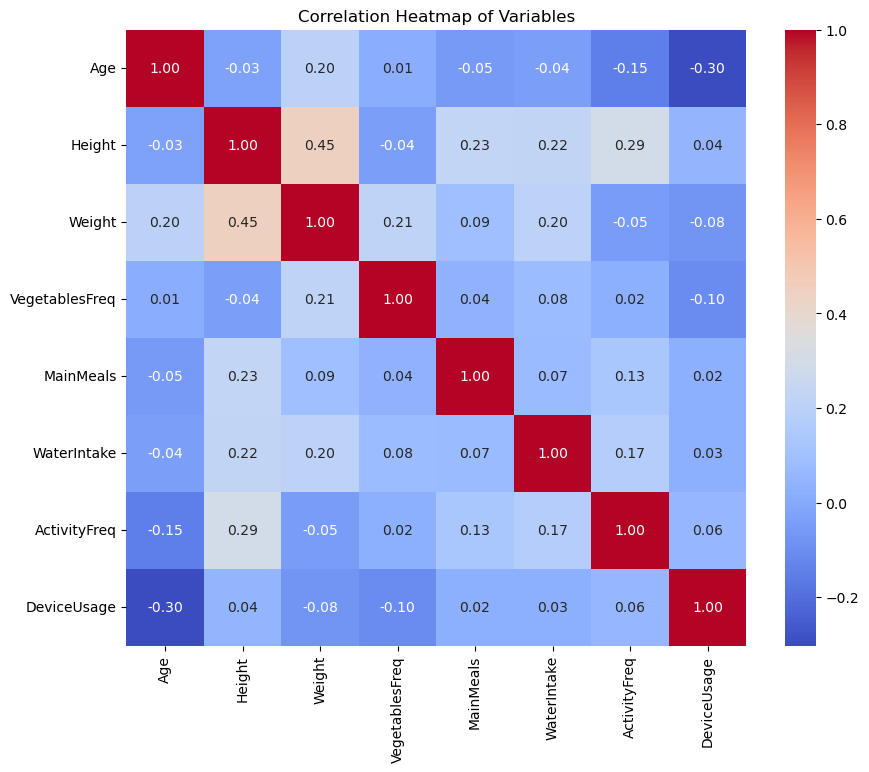

In [885]:
numerical_df = dataframe.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

There is a positive correlation between:
Height and Weight (correlation coefficient: 0.45): Taller individuals tend to have higher weights.
Weight and WaterIntake (correlation coefficient: 0.20): Individuals with higher weights tend to have slightly higher water intake.

There is a negative correlation between:
Age and DeviceUsage (correlation coefficient: -0.30): Older individuals tend to use devices less frequently.
Age and ActivityFreq (correlation coefficient: -0.15): Older individuals tend to engage in physical activity less frequently.

There are weak correlations (close to 0) between:
Age and Height
Age and MainMeals
Age and VegetablesFreq
MainMeals and VegetablesFreq
MainMeals and WaterIntake
WaterIntake and ActivityFreq
WaterIntake and DeviceUsage

In [886]:
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                     Age    Height    Weight  VegetablesFreq  MainMeals  \
Age             1.000000 -0.030178  0.198889        0.014622  -0.053660   
Height         -0.030178  1.000000  0.447895       -0.040004   0.231096   
Weight          0.198889  0.447895  1.000000        0.214228   0.089633   
VegetablesFreq  0.014622 -0.040004  0.214228        1.000000   0.035734   
MainMeals      -0.053660  0.231096  0.089633        0.035734   1.000000   
WaterIntake    -0.041687  0.224916  0.204556        0.076894   0.071552   
ActivityFreq   -0.147109  0.293923 -0.051733        0.021822   0.128206   
DeviceUsage    -0.302202  0.044004 -0.076434       -0.104149   0.020707   

                WaterIntake  ActivityFreq  DeviceUsage  
Age               -0.041687     -0.147109    -0.302202  
Height             0.224916      0.293923     0.044004  
Weight             0.204556     -0.051733    -0.076434  
VegetablesFreq     0.076894      0.021822    -0.104149  
MainMeals          0.071552      0.1282

## 5: CONCLUSION

In conclusion, the exploratory data analysis (EDA) conducted on the dataset provides valuable insights into the relationships between different variables and obesity conditions.

1. Demographic Factors: Gender, age, and family history of overweight play significant roles in determining obesity conditions.
2. Health Indicators: Weight, height, and dietary habits such as the frequency of main meals and consumption of high-calorie foods are closely associated with obesity.
3. Lifestyle Factors: Physical activity frequency, mode of transportation, and alcohol intake are also linked to obesity conditions.

Patterns Observed:
1. Individuals with obesity tend to have higher weight and height values.
2. Those with higher alcohol intake may have lower physical activity levels.
3. Different transportation modes may influence physical activity frequency, with walking and biking associated with higher activity levels.
4. Dietary habits, such as consuming high-calorie foods, can impact the frequency of vegetable consumption.

Recommendations:
1. Encouraging healthier dietary habits, such as reducing high-calorie food intake and increasing vegetable consumption, may help in managing obesity.
2. Promoting physical activity, especially through active modes of transportation like walking or biking, can contribute to weight management.
3. Educating individuals about the potential impacts of alcohol intake on physical activity levels may also be beneficial.

Overall, this EDA serves as a foundation for further analysis and intervention strategies aimed at addressing obesity and promoting healthier lifestyles.